In [1]:
%load_ext memory_profiler
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import time
from memory_profiler import profile
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.cluster import  KMeans


In [2]:
X = np.load("data/p1/X.npy")
y = np.load("data/p1/y.npy")

In [3]:
print(X.shape)

(511, 45768)


In [4]:
np.max(X[:,0])

11.941397591320595

In [5]:
# log
X_log = np.log2(X + 1)

In [6]:
# Largest entry of first column
print(np.max(X_log[:,0]))

3.6939215228197613


In [7]:
%%timeit -n 1 -r 1
%%memit -r 1
pca =  PCA().fit(X)
pca_log = PCA().fit(X_log)

peak memory: 1535.44 MiB, increment: 975.61 MiB
4.97 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
# percentage of variance explained by first component
print("First component raw:", pca.explained_variance_ratio_[0])
print("First component log:", pca_log.explained_variance_ratio_[0])

First component raw: 0.42779670983572776
First component log: 0.13887564870826172


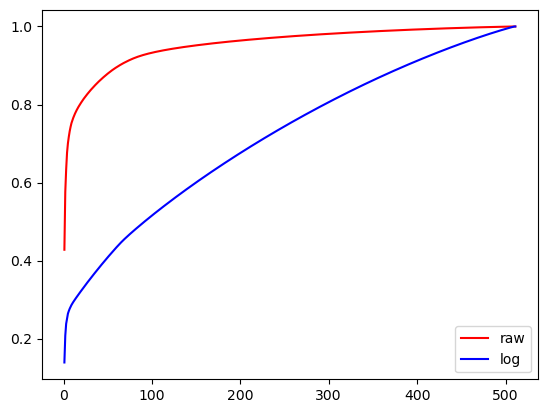

In [9]:
# cumalative variance explained plots
plt.plot(range(1, X.shape[0]+1), np.cumsum(pca.explained_variance_ratio_),  color="red", label="raw")
plt.plot(range(1, X.shape[0]+1), np.cumsum(pca_log.explained_variance_ratio_), color="blue", label="log")
plt.legend()
plt.show()

In [10]:
# 85% variance cutoffs
print("Raw:", np.where(np.cumsum(pca.explained_variance_ratio_) >= .85)[0][0] + 1)
print("Log:", np.where(np.cumsum(pca_log.explained_variance_ratio_) >= .85)[0][0] + 1)

Raw: 36
Log: 339


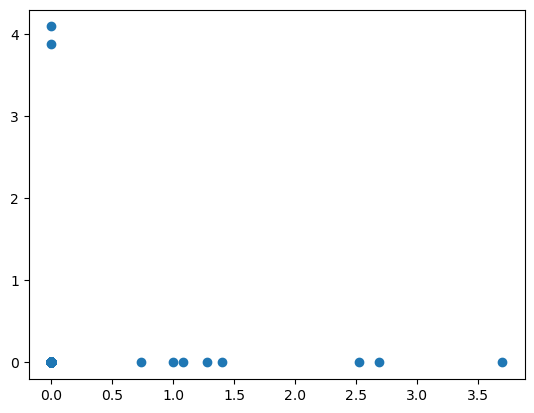

In [11]:
# plotting without visualization techniques
plt.scatter(X_log[:,0],X_log[:,1])

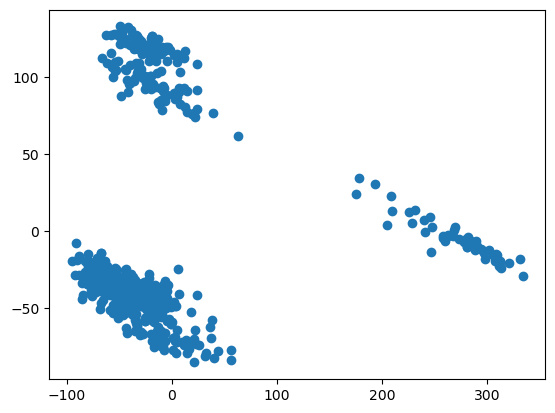

In [12]:
# PCA visualization
z = pca_log.transform(X_log)
plt.scatter(z[:,0],z[:,1])

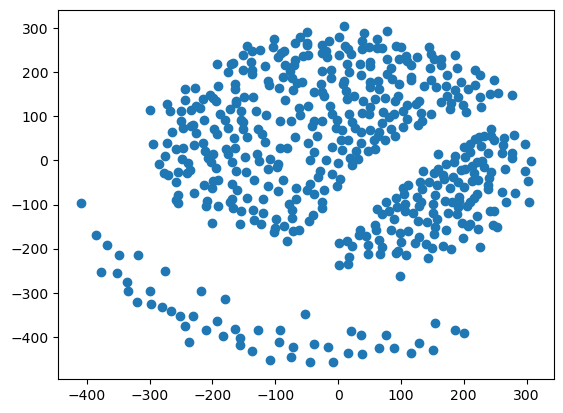

In [13]:
# MDS
mds=MDS(n_components=2).fit_transform(X_log)
plt.scatter(mds[:,0],mds[:,1])

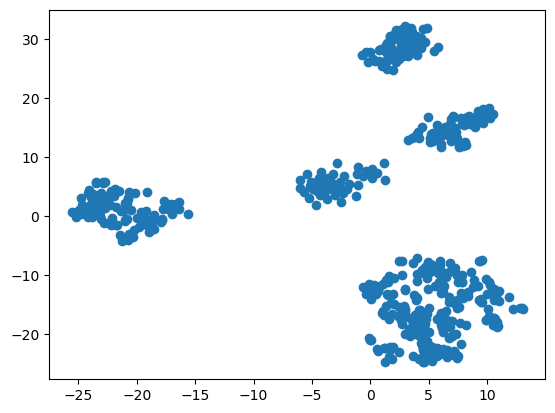

In [14]:
# T-SNE
z_tsne = TSNE(n_components=2,perplexity=40).fit_transform(z[:,0:50])
plt.scatter(z_tsne[:,0],z_tsne[:,1])

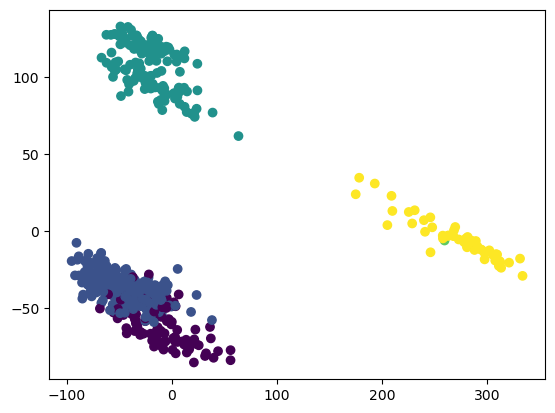

In [18]:
# K-Means
kmeans  = KMeans(5, tol=1e-6)
kmeans.fit(z[:,0:50])
plt.scatter(z[:,0],z[:,1], c=kmeans.labels_)

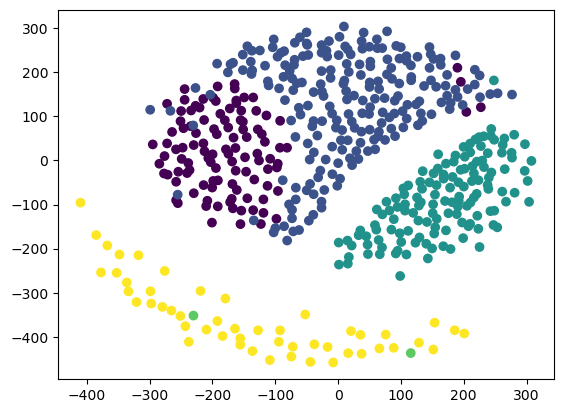

In [20]:
# clusters: MDA with Kmeans plot
plt.scatter(mds[:,0],mds[:,1],c=kmeans.labels_)

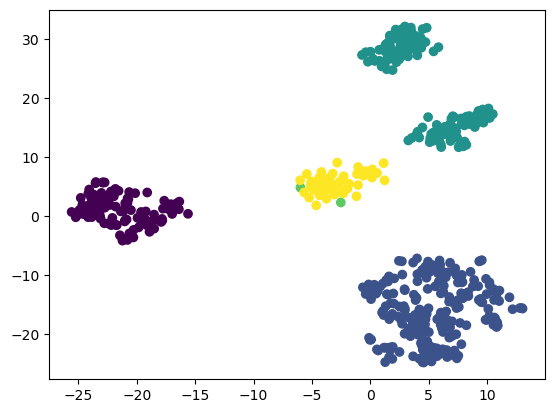

In [21]:
# T-SNE plot
plt.scatter(z_tsne[:,0],z_tsne[:,1], c=kmeans.labels_)

Num clusters 2 Insertia: 10981774.770899618
Num clusters 3 Insertia: 10489484.49738619
Num clusters 4 Insertia: 7087557.1551137455
Num clusters 5 Insertia: 5801585.180913829
Num clusters 6 Insertia: 5709141.8399294065
Num clusters 7 Insertia: 5438751.587824011
Num clusters 8 Insertia: 5235320.9717019405
Num clusters 9 Insertia: 5373706.079925061


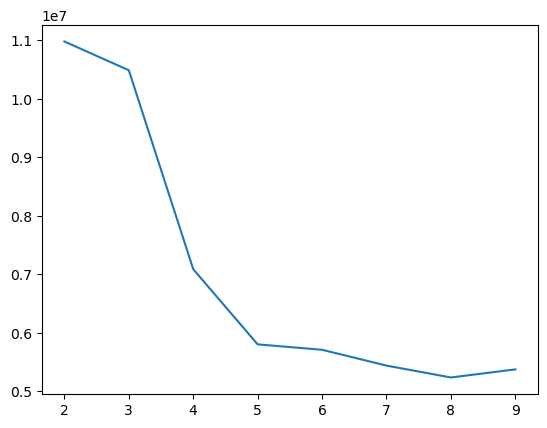

In [22]:
# Elbow Method
all_kmeans = [i for i in range(8)]
for i in range(8):
    cur_kmeans = KMeans(i+2)
    cur_kmeans.fit(z[:,0:50])
    print("Num clusters", i+2, "Insertia:", cur_kmeans.inertia_)
    all_kmeans[i] = cur_kmeans
plt.plot([i+2 for i in range(8)], [all_kmeans[i].inertia_ for i in range(8)])
    

In [23]:
# MDS on Kmeans cluster means
cmeans = np.zeros((5,X_log.shape[1]))
for c in range(5):
    cmeans[c] = np.mean(X_log[np.where(kmeans.labels_==c)[0]],axis=0)
    

breaking at iteration 23 with stress 6496.471873888449
breaking at iteration 193 with stress 6496.470614313324
breaking at iteration 159 with stress 6327.861380907627
breaking at iteration 39 with stress 6327.911904137376


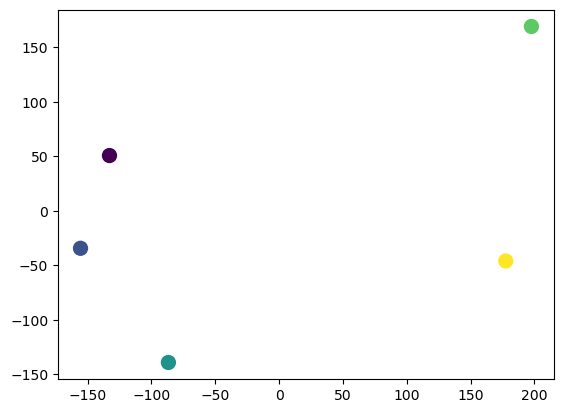

In [24]:
mds = MDS(n_components=2,verbose=1,eps=1e-5)
mds.fit(cmeans)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=[0,1,2,3,4],s=100)

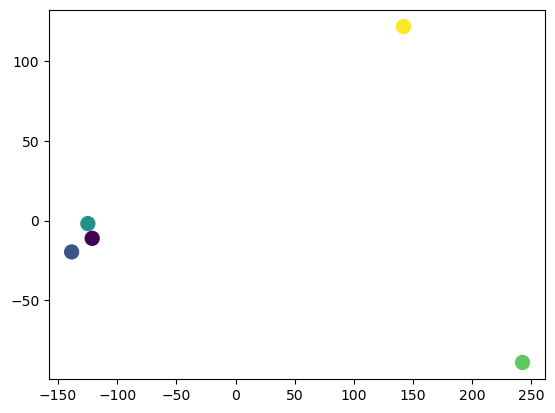

In [31]:
# PCA on cluster means
z_means = PCA(2).fit_transform(cmeans)
plt.scatter(z_means[:,0],z_means[:,1],c=[0,1,2,3,4],s=100)

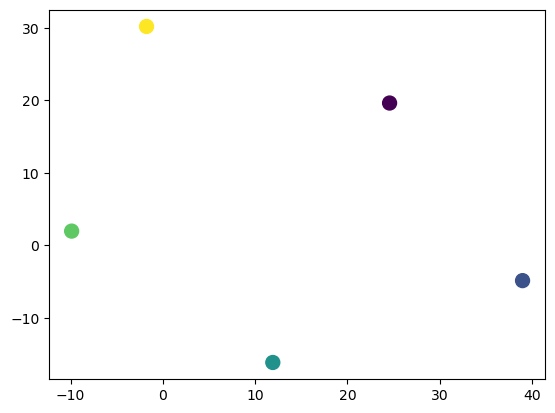

In [34]:
# Emergence of at least 5 clusters. 
z_means_tsne = TSNE(n_components=2,perplexity=4).fit_transform(cmeans)
plt.scatter(z_means_tsne[:,0],z_means_tsne[:,1],c=[0,1,2,3,4],s=100)

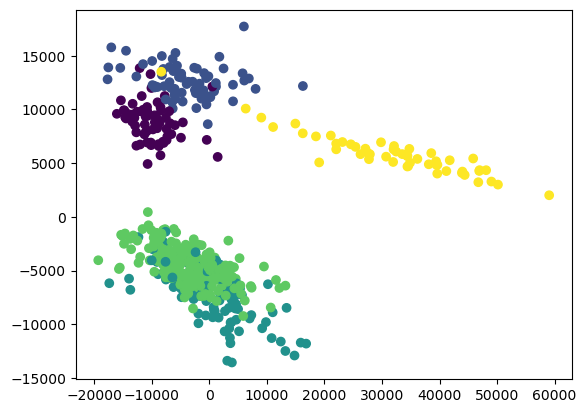

In [38]:
# PCA, MDS, T-SNE on Raw Data
pca = PCA(50).fit(X)
z = pca.transform(X)
plt.scatter(z[:,0],z[:,1],c=y)

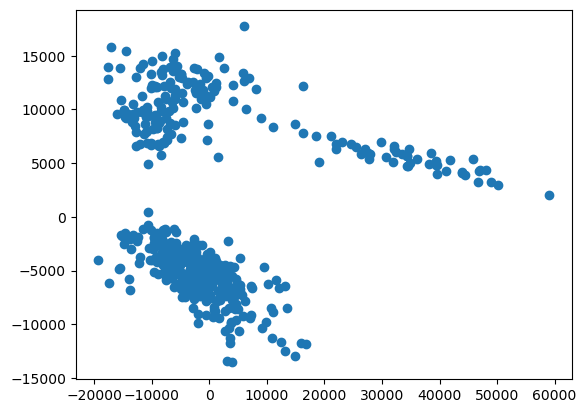

In [39]:
pca = PCA(50).fit(X)
z = pca.transform(X)
plt.scatter(z[:,0],z[:,1])


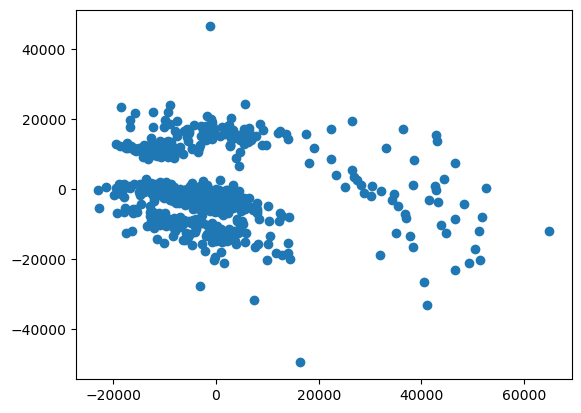

In [40]:
mds = MDS(n_components=2,verbose=1,eps=1e-5)
mds.fit(z[:,0:50])
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1])

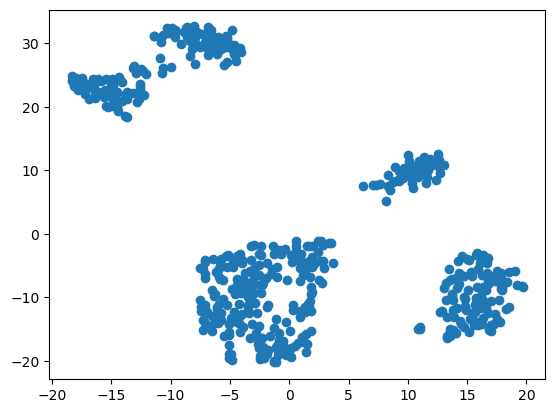

In [43]:
z_tsne = TSNE(n_components=2,perplexity=40).fit_transform(z[:,0:50])
plt.scatter(z_tsne[:,0],z_tsne[:,1])

In [46]:
# Problem 2
# Visualization
X = np.load("data/p2_unsupervised/X.npy")
X = np.log2(X + 1)

In [50]:
print(X.shape)

(2169, 45768)


In [52]:
np.max(X[:,0])

5.972169178513185

In [54]:
n_pcs = 50
pca = PCA(n_components=n_pcs).fit(X)
z = pca.transform(X)

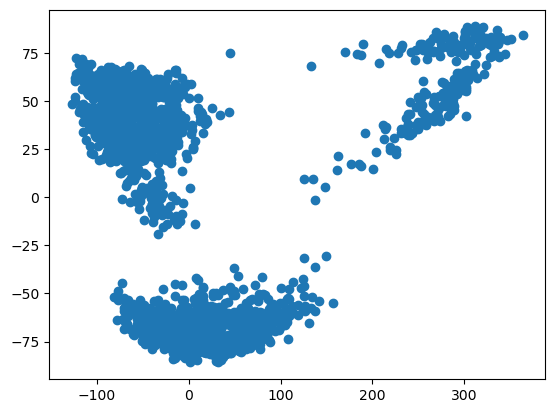

In [55]:
# Three distinct clusters, corresponding  to inhibitory or excitatory neurons, and non-neuronal cells.
plt.scatter(z[:,0],z[:,1])

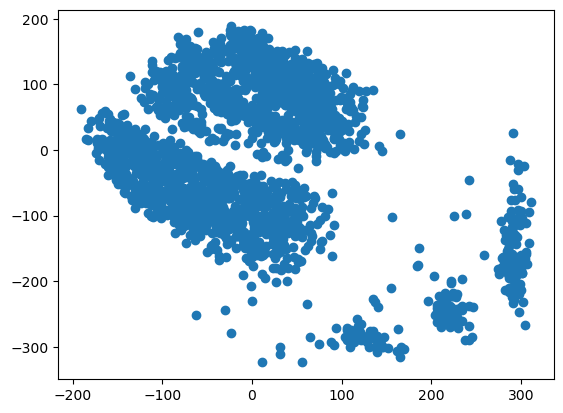

In [56]:
#MDS on the first 50 PCs
mds=MDS(n_components=2).fit_transform(z[:,0:50])
plt.scatter(mds[:,0],mds[:,1])